# Analyse de l'écosystème de diffusion de jeux sur Twitch

> *Tendances, statistiques des jeux streamés et hypothèses exploratoires*
>
> **Auteurs**: *Ugo Courche*, *Hadrien Belleville*

## Introduction

La première étape consiste à organiser l'environnement de développement en important pandas et le jeux de données.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Twitch_game_data.csv")
df.head(5)

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


Ensuite, nous regardons les types d'objets que nous allons manipuler durant ce rapport.

In [4]:
df.dtypes

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_streamed        int64
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

On remarque que les colonnes **'Month'** et **'Year'** sont des `int64`. Cela ne posera pas de problème lorsqu'il faudra manipuler uniquement des mois ou des années. Nonobstant il pourrait être intéressant d'avoir une colonne de type `datetime` que nous pourrions utiliser en ayant l'information de l'année et du mois pour ainsi observer des évolutions au mois près durant plusieurs années.

C'est ce que nous faisons dans le bloc suivant où on ajoute une colonne **'Date'** au dataframe en spécifiant le format `'AAAA-MM'` et en ne gardant que la période au mois près (on ne s'occupe pas des jours).

Cette colonne contiendra donc des informations de type `period[M]`, depuis lequel nous pourrons retrouver le format `datetime64` en ajoutant, lorsque nécessaire, l'appel à la fonction `dt.to_timestamp()` sur la colonne **'Date'**.

In [5]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str), format='%Y%m').dt.to_period('M')
df[["Game", "Month", "Year", "Date"]].head(3)

,Game,Month,Year,Date
0,League of Legends,1,2016,2016-01
1,Counter-Strike: Global Offensive,1,2016,2016-01
2,Dota 2,1,2016,2016-01


## Influence des pics de spectateurs sur la popularité générale d'un jeu

> **Hypothèse**: Les jeux qui génèrent des pics de spectateurs élevés sont plus susceptibles d'attirer de nouveaux joueurs et de maintenir une base de fans active.

Pour tester l'hypothèse de l'influence des pics de spectateurs sur la popularité générale d'un jeu il faut réussir à mettre en évidence pour un echantillon de jeux si les pics de spectateurs ont une influence sur l'évolution de la popularité des jeux.

Prenons l'exemple de 4 jeux, avec League of Legends, Dota 2, SMITE et Heroes of the Storm. Ces jeux sont 4 MOBA (Multiplayer Online Battle Arena) ayant des communautés très distinctes et des renommées bien différentes.

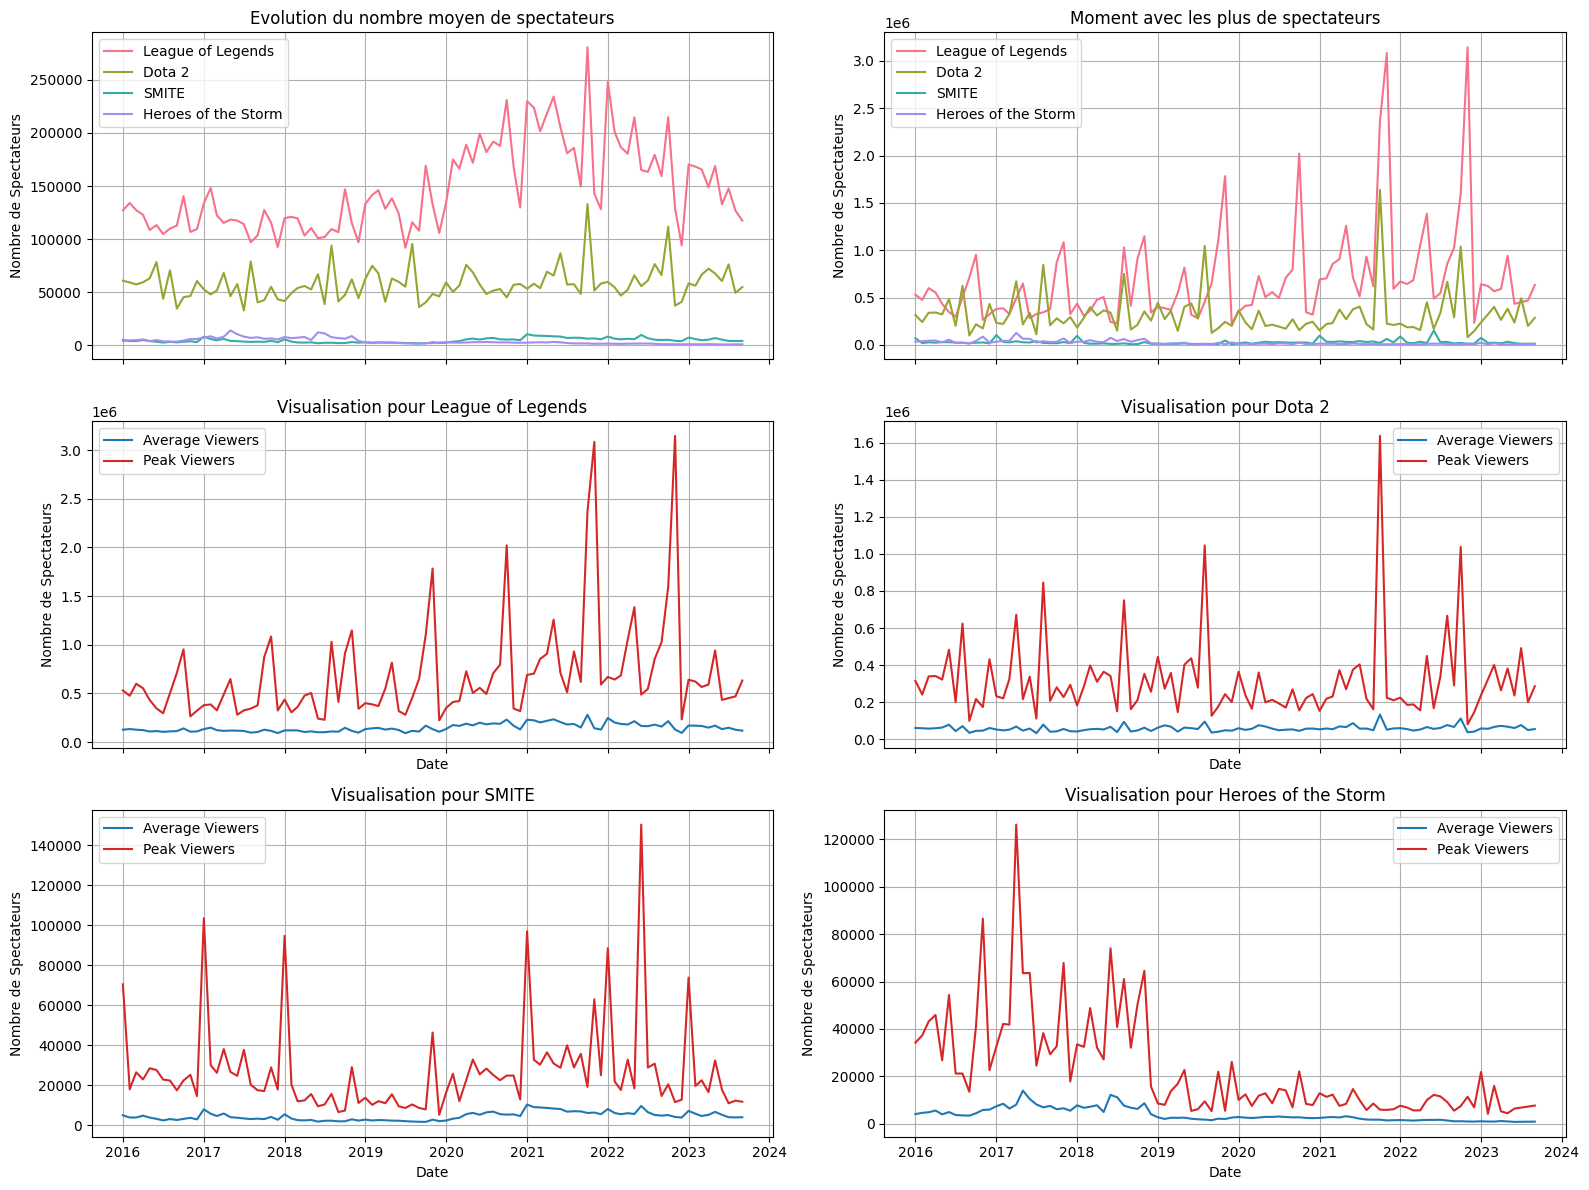

In [6]:
selected_games = ['League of Legends', 'Dota 2', 'SMITE', 'Heroes of the Storm']
selected_data = df[df['Game'].isin(selected_games)]

selected_data = selected_data.sort_values('Date')
selected_data['Date'] = selected_data['Date'].dt.to_timestamp()

fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True)

axes = axes.flatten()

# Tracé 1 : Evolution du nombre moyen de spectateurs
sns.lineplot(data=selected_data, x='Date', y='Avg_viewers', hue='Game', palette='husl', ax=axes[0])
axes[0].set_title('Evolution du nombre moyen de spectateurs')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de Spectateurs')
axes[0].legend()
axes[0].grid(True)

# Tracé 2 : Moment avec les plus de spectateurs
sns.lineplot(data=selected_data, x='Date', y='Peak_viewers', hue='Game', palette='husl', ax=axes[1])
axes[1].set_title('Moment avec les plus de spectateurs')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de Spectateurs')
axes[1].legend()
axes[1].grid(True)

for i, games in enumerate(selected_games):
    lol_data = selected_data[selected_data['Game']==games]
    axes[i+2].plot(lol_data['Date'], lol_data['Avg_viewers'], linestyle='-', label='Average Viewers', color='tab:blue')
    axes[i+2].plot(lol_data['Date'], lol_data['Peak_viewers'], linestyle='-', label='Peak Viewers', color='tab:red')
    axes[i+2].set_title(f'Visualisation pour ' + games)
    axes[i+2].set_xlabel('Date')
    axes[i+2].set_ylabel('Nombre de Spectateurs')
    axes[i+2].legend()
    axes[i+2].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()


Pour ces jeux, le pic de spectateur n'a pas l'air d'avoir une grande influence sur l'évolution des moyennes de spectateurs. Cependant on remarque que les pics de spectateurs augmentent significativement la moyenne de spectateurs lors du mois courant. 

Il faut aussi prendre en considération le fait que ces jeux sont des jeux en lignes. Nous faisons la même visulation pour 4 jeux qui sont des jeux solos pour voir s'il y a des courbes différentes.

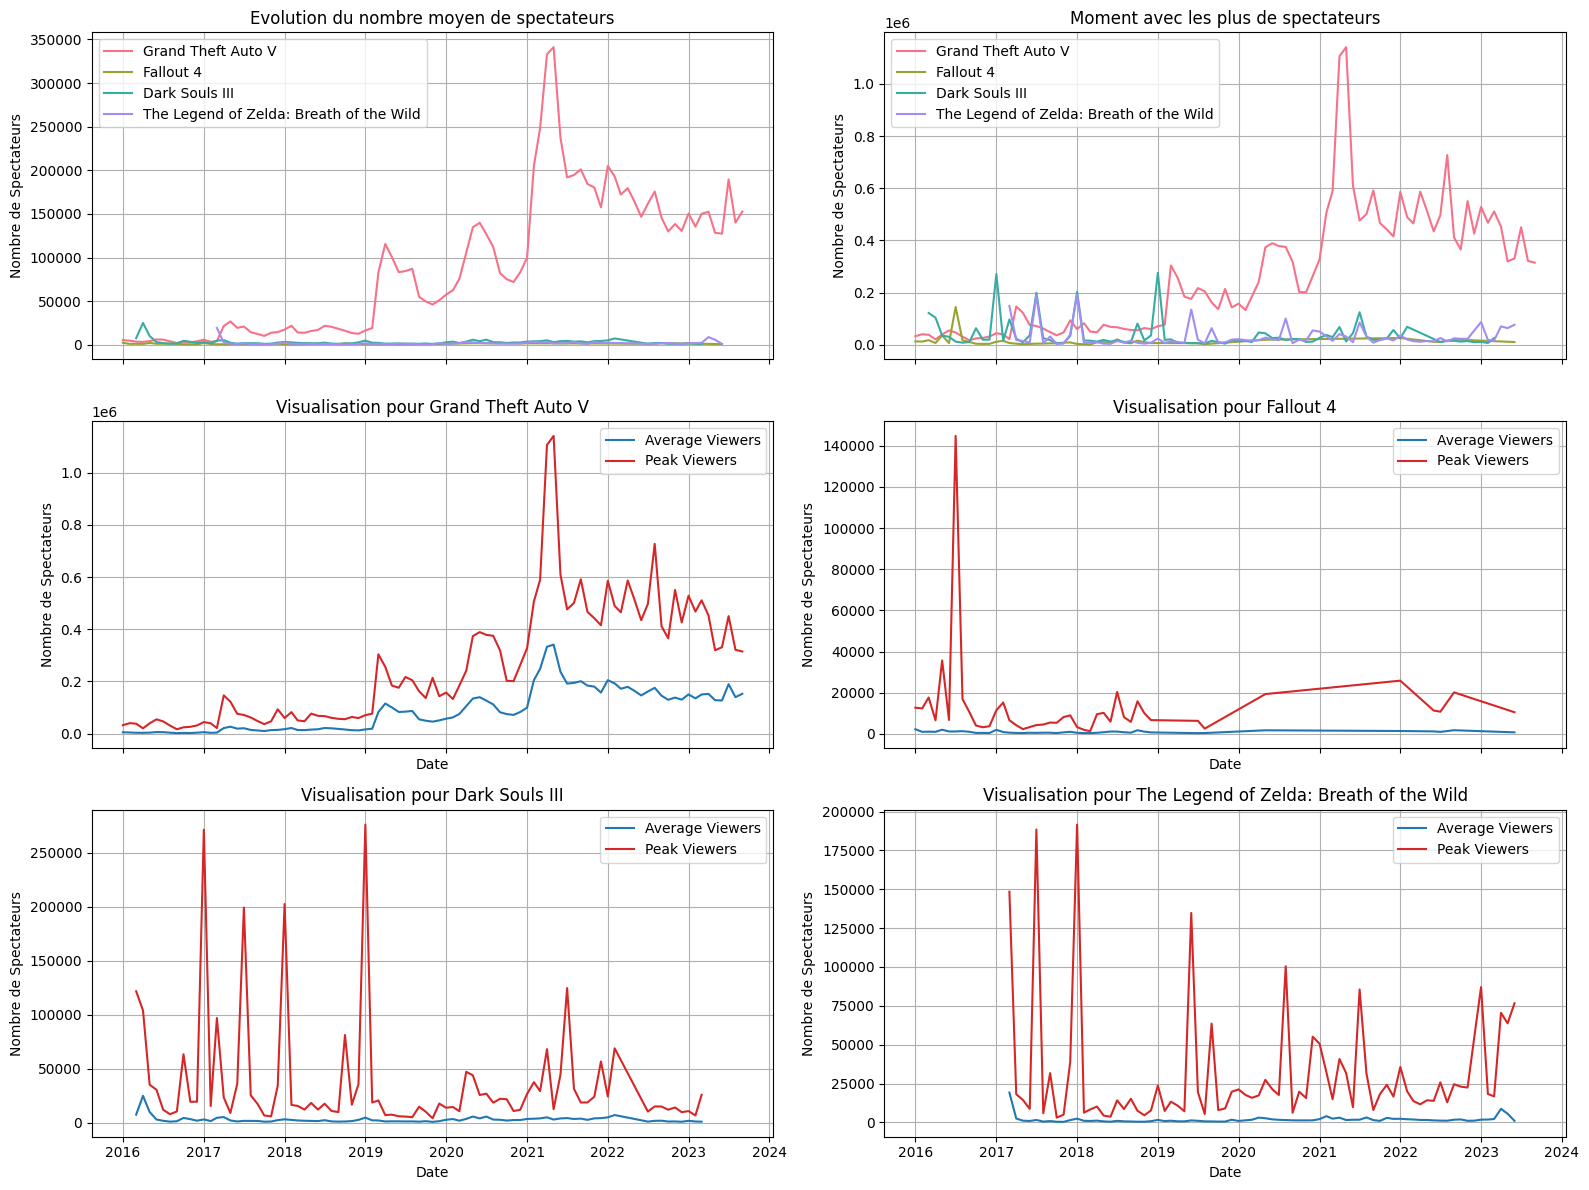

In [16]:
selected_games_new = ['Grand Theft Auto V', 'Fallout 4', 'Dark Souls III', 'The Legend of Zelda: Breath of the Wild']
selected_data_new = df[df['Game'].isin(selected_games_new)]

selected_data_new = selected_data_new.sort_values('Date')
selected_data_new['Date'] = selected_data_new['Date'].dt.to_timestamp()

fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=True)

axes = axes.flatten()

# Tracé 1 : Evolution du nombre moyen de spectateurs
sns.lineplot(data=selected_data_new, x='Date', y='Avg_viewers', hue='Game', palette='husl', ax=axes[0])
axes[0].set_title('Evolution du nombre moyen de spectateurs')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Nombre de Spectateurs')
axes[0].legend()
axes[0].grid(True)

# Tracé 2 : Moment avec les plus de spectateurs
sns.lineplot(data=selected_data_new, x='Date', y='Peak_viewers', hue='Game', palette='husl', ax=axes[1])
axes[1].set_title('Moment avec les plus de spectateurs')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nombre de Spectateurs')
axes[1].legend()
axes[1].grid(True)

for i, games in enumerate(selected_games_new):
    game_data = selected_data_new[selected_data_new['Game'] == games]
    axes[i+2].plot(game_data['Date'], game_data['Avg_viewers'], linestyle='-', label='Average Viewers', color='tab:blue')
    axes[i+2].plot(game_data['Date'], game_data['Peak_viewers'], linestyle='-', label='Peak Viewers', color='tab:red')
    axes[i+2].set_title(f'Visualisation pour ' + games)
    axes[i+2].set_xlabel('Date')
    axes[i+2].set_ylabel('Nombre de Spectateurs')
    axes[i+2].legend()
    axes[i+2].grid(True)

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

Pour ces jeux on ne peut pas réellement remarquer de patterns communs. On voit que pour GTA V, les courbes des peaks et average viewers ont tendance à se suivre.

### Exploitation de ces données

De ces tableaux ressortent deux tendances qui influent sur les pics de spectateurs et donc sur la popularité générale d'un jeu. 

+ La saisonnalité d'un jeu (passe de combats, événements e-sportifs, etc...)
+ Le renouvellement de contenu (DLC, suite de licence, grosse mise a jour, etc...)

Pour le mettre en évidence, nous nous appuyons sur deux jeux qui marquent fortement ces tendances: 

+ League of Legends pour la saisonnalité
+ GTA V pour le renouvellement de contenu

#### Impact de la saisonnalité pour League of Legends

#### Impact du renouvellement de contenu pour GTA V

> *Toutes les dates de sorties des DLC et mise à jour sont disponnible via ce lien: https://rockstaractu.com/jeux/gta-online/mises-a-jour/*

## Conclusion

TODO